In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


In [32]:
red = pd.read_csv('C:\program\winequality-red.csv', low_memory=False, sep=';')
white = pd.read_csv('C:\program\winequality-white.csv', low_memory=False, sep=';')

In [33]:
x=red.drop('quality',axis=1)
y=red['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [34]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

In [35]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

In [36]:
def log_regression(red):
    # local variable to identify if the wine_set red or white
    w = red


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)


    # split into training and testing sets
    predictors = red[["sulphates", 'alcohol']]
    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = LogisticRegression()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Logistic Regression------------------------')
log_regression(red)

----------------Logistic Regression------------------------
Confusion Matrix:
 [[222  87]
 [103 228]]
Accuracy: 0.703125
Score: 0.703125
RMSE: 0.5448623679425842


In [39]:
def decis_tree(red):
    # local variable to identify if the wine_set red or white
    w = red


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)


    # split into training and testing sets
    predictors = red[['density', 'alcohol']]
    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = DecisionTreeClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Decision Tree------------------------')
decis_tree(red)

----------------Decision Tree------------------------
Confusion Matrix:
 [[221  86]
 [ 86 247]]
Accuracy: 0.73125
Score: 0.73125
RMSE: 0.518411033833193


In [40]:
def knn(red):
    
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)

    # split into training and testing sets
    predictors = red[['density', 'alcohol']]
    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    
    
    # build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
print('----------------KNN------------------------')
knn(red)

----------------KNN------------------------
Confusion Matrix:
 [[202  98]
 [100 240]]
Accuracy: 0.690625
Score: 0.690625
RMSE: 0.5562148865321748


In [44]:
def naive(red):
   
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)

    # split into training and testing sets
    predictors = red[["density", 'alcohol', 'sulphates', 'pH']]
    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    

    classifier = GaussianNB()
    classifier.fit(pred_train, tar_train)
    predictionsG = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsG))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsG))
    print("Gaus:" + str(classifier.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsG, tar_test)
    print('MSE:',mse ** 0.5)

    classifierm = MultinomialNB()
    classifierm.fit(pred_train, tar_train)
    predictionsM = classifierm.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsM))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsM))
    print("Multi:" + str(classifierm.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsM, tar_test)
    print('MSE:',mse ** 0.5)

    classifierb = BernoulliNB()
    classifierb.fit(pred_train, tar_train)
    predictionsB = classifierb.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsB))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsB))
    print("Bernoulli:" + str(classifierb.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsB, tar_test)
    print('MSE:',mse ** 0.5)
print('----------------Naive Bayes------------------------')
naive(red)
    

----------------Naive Bayes------------------------
Confusion Matrix:
 [[238  69]
 [133 200]]
Accuracy: 0.684375
Gaus:0.684375
MSE: 0.5618051263561058

Confusion Matrix:
 [[  0 307]
 [  0 333]]
Accuracy: 0.5203125
Multi:0.5203125
MSE: 0.6925947588597534

Confusion Matrix:
 [[  0 307]
 [  0 333]]
Accuracy: 0.5203125
Bernoulli:0.5203125
MSE: 0.6925947588597534


----------------Random Forests------------------------
Confusion matrix:
 [[215  86]
 [ 68 271]]
Accuracy: 0.759375

Importance of predictors:
[('alcohol', 0.31696273385114754), ('sulphates', 0.2658468519627835), ('density', 0.21185665533977), ('pH', 0.20533375884629906)]


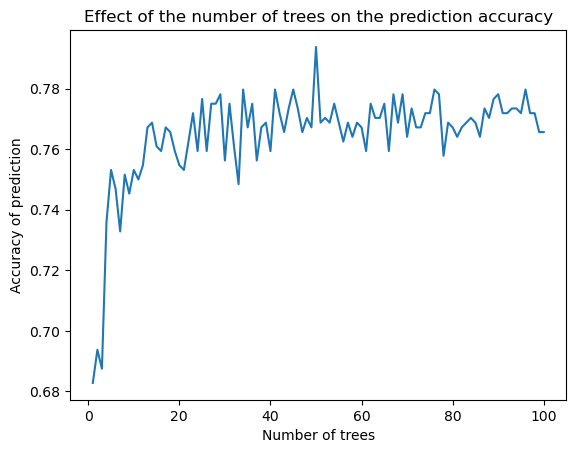

[0.6828125, 0.69375, 0.6875, 0.7359375, 0.753125, 0.746875, 0.7328125, 0.7515625, 0.7453125, 0.753125, 0.75, 0.7546875, 0.7671875, 0.76875, 0.7609375, 0.759375, 0.7671875, 0.765625, 0.759375, 0.7546875, 0.753125, 0.7625, 0.771875, 0.759375, 0.7765625, 0.759375, 0.775, 0.775, 0.778125, 0.75625, 0.775, 0.7609375, 0.7484375, 0.7796875, 0.7671875, 0.775, 0.75625, 0.7671875, 0.76875, 0.759375, 0.7796875, 0.771875, 0.765625, 0.7734375, 0.7796875, 0.7734375, 0.765625, 0.7703125, 0.7671875, 0.79375, 0.76875, 0.7703125, 0.76875, 0.775, 0.76875, 0.7625, 0.76875, 0.7640625, 0.76875, 0.7671875, 0.759375, 0.775, 0.7703125, 0.7703125, 0.775, 0.759375, 0.778125, 0.76875, 0.778125, 0.7640625, 0.7734375, 0.7671875, 0.7671875, 0.771875, 0.771875, 0.7796875, 0.778125, 0.7578125, 0.76875, 0.7671875, 0.7640625, 0.7671875, 0.76875, 0.7703125, 0.76875, 0.7640625, 0.7734375, 0.7703125, 0.7765625, 0.778125, 0.771875, 0.771875, 0.7734375, 0.7734375, 0.771875, 0.7796875, 0.771875, 0.771875, 0.765625, 0.765625]


In [46]:
def random_forests(red):
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)

    # split into training and testing sets
    predictors = red[["density", 'alcohol', 'sulphates', 'pH']]

    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data#
    classifier = RandomForestClassifier(n_estimators=25)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion matrix:\n', sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

    # to display the relative importance of each predictive variable
    model = ExtraTreesClassifier()
    model.fit(pred_train, tar_train)

    print('\nImportance of predictors:')
    dct = dict()
    for c in range(len(predictors.columns)):
        dct[predictors.columns[c]] = model.feature_importances_[c]
    print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

# run different numbers of trees to see the effect of the number on the accuracy of the prediction
    n = 100
    accuracy = [0]*n

    for i in range(n):
        classifier = RandomForestClassifier(n_estimators=i+1)
        classifier = classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)
        accuracy[i] = sklearn.metrics.accuracy_score(tar_test, predictions)

    plt.plot(range(1, n+1), accuracy)
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy of prediction")
    plt.title("Effect of the number of trees on the prediction accuracy")
    plt.show()

    print(accuracy)

print('----------------Random Forests------------------------')
random_forests(red)
